In [2]:
pip install gradio

     |████████████████████████████████| 979 kB 12.6 MB/s 
     |████████████████████████████████| 206 kB 68.7 MB/s 
     |████████████████████████████████| 2.0 MB 55.7 MB/s 
     |████████████████████████████████| 63 kB 2.9 MB/s 
     |████████████████████████████████| 3.6 MB 34.3 MB/s 
     |████████████████████████████████| 961 kB 51.5 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4710 sha256=0d80d91d6f51ab49769f4dbc48bffd90ed01c08a79cdc789cf6650d1eff75282
  Stored in directory: /root/.cache/pip/wheels/13/e4/6c/e8059816e86796a597c6e6b0d4c880630f51a1fcfa0befd5e6
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-py3-none-any.whl size=3371 sha256=2114761fc42a1243f12231bc9ce26c84348a15f3e917c9b900fb597bd4c811ba
  Stored in directory: /root/.cache/pip/wheels/28/c0/c4/44687421dab41455be93112bd1b0dee1f3c5a9aa27bee63708
Successfully built ffmpy flask-cachebuster


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import gradio
import gradio as gr

In [4]:
import zipfile
import os

In [ ]:
!wget --no-check-certificate \
    "https://github.com/deekshagupta/dress/archive/refs/heads/main.zip" \
    -O "/tmp/dress.zip"


zip_ref = zipfile.ZipFile('/tmp/dress.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

/tmp/dress-main/black_dress/408.jpg


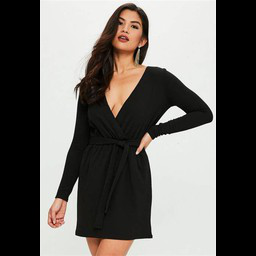

In [6]:
import PIL
import pathlib
data_dir = pathlib.Path('/tmp/dress-main')
black_dress = list(data_dir.glob('black_dress/*'))
print(black_dress[0])
PIL.Image.open(str(black_dress[0]))

In [7]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6442 files belonging to 12 classes.
Using 5154 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6442 files belonging to 12 classes.
Using 1288 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['black_dress', 'black_pants', 'black_shirt', 'black_shoes', 'black_shorts', 'black_suit', 'blue_dress', 'blue_pants', 'blue_shirt', 'blue_shoes', 'blue_shorts', 'brown_hoodie']


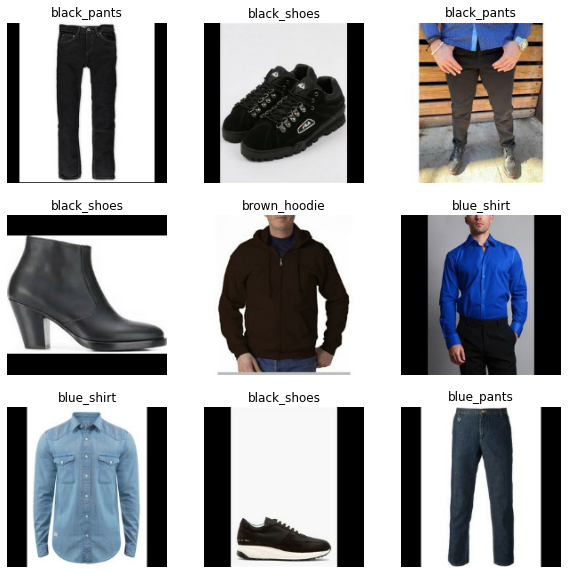

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

num_classes = 12

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)), #rescaling the input to new range
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


162/162 [==============================] - 157s 966ms/step - loss: 0.9782 - accuracy: 0.6905 - val_loss: 0.5534 - val_accuracy: 0.8339
Epoch 2/10
162/162 [==============================] - 157s 967ms/step - loss: 0.3700 - accuracy: 0.8818 - val_loss: 0.4946 - val_accuracy: 0.8587
Epoch 3/10
162/162 [==============================] - 155s 959ms/step - loss: 0.2299 - accuracy: 0.9267 - val_loss: 0.4921 - val_accuracy: 0.8610
Epoch 4/10
162/162 [==============================] - 156s 960ms/step - loss: 0.1391 - accuracy: 0.9542 - val_loss: 0.5183 - val_accuracy: 0.8742
Epoch 5/10
162/162 [==============================] - 156s 961ms/step - loss: 0.1077 - accuracy: 0.9672 - val_loss: 0.5211 - val_accuracy: 0.8828
Epoch 6/10
162/162 [==============================] - 156s 963ms/step - loss: 0.0620 - accuracy: 0.9802 - val_loss: 0.5416 - val_accuracy: 0.8773
Epoch 7/10
162/162 [==============================] - 156s 960ms/step - loss: 0.0428 - accuracy: 0.9860 - val_loss: 0.5999 - val_accura

In [14]:
def predict_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(12)}

In [ ]:

image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=12)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://26254.gradio.app

This share link will expire in 72 hours. To get longer links, send an email to: support@gradio.app
